In [ ]:
%pip install XlsxWriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 4.6 MB/s eta 0:00:00


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

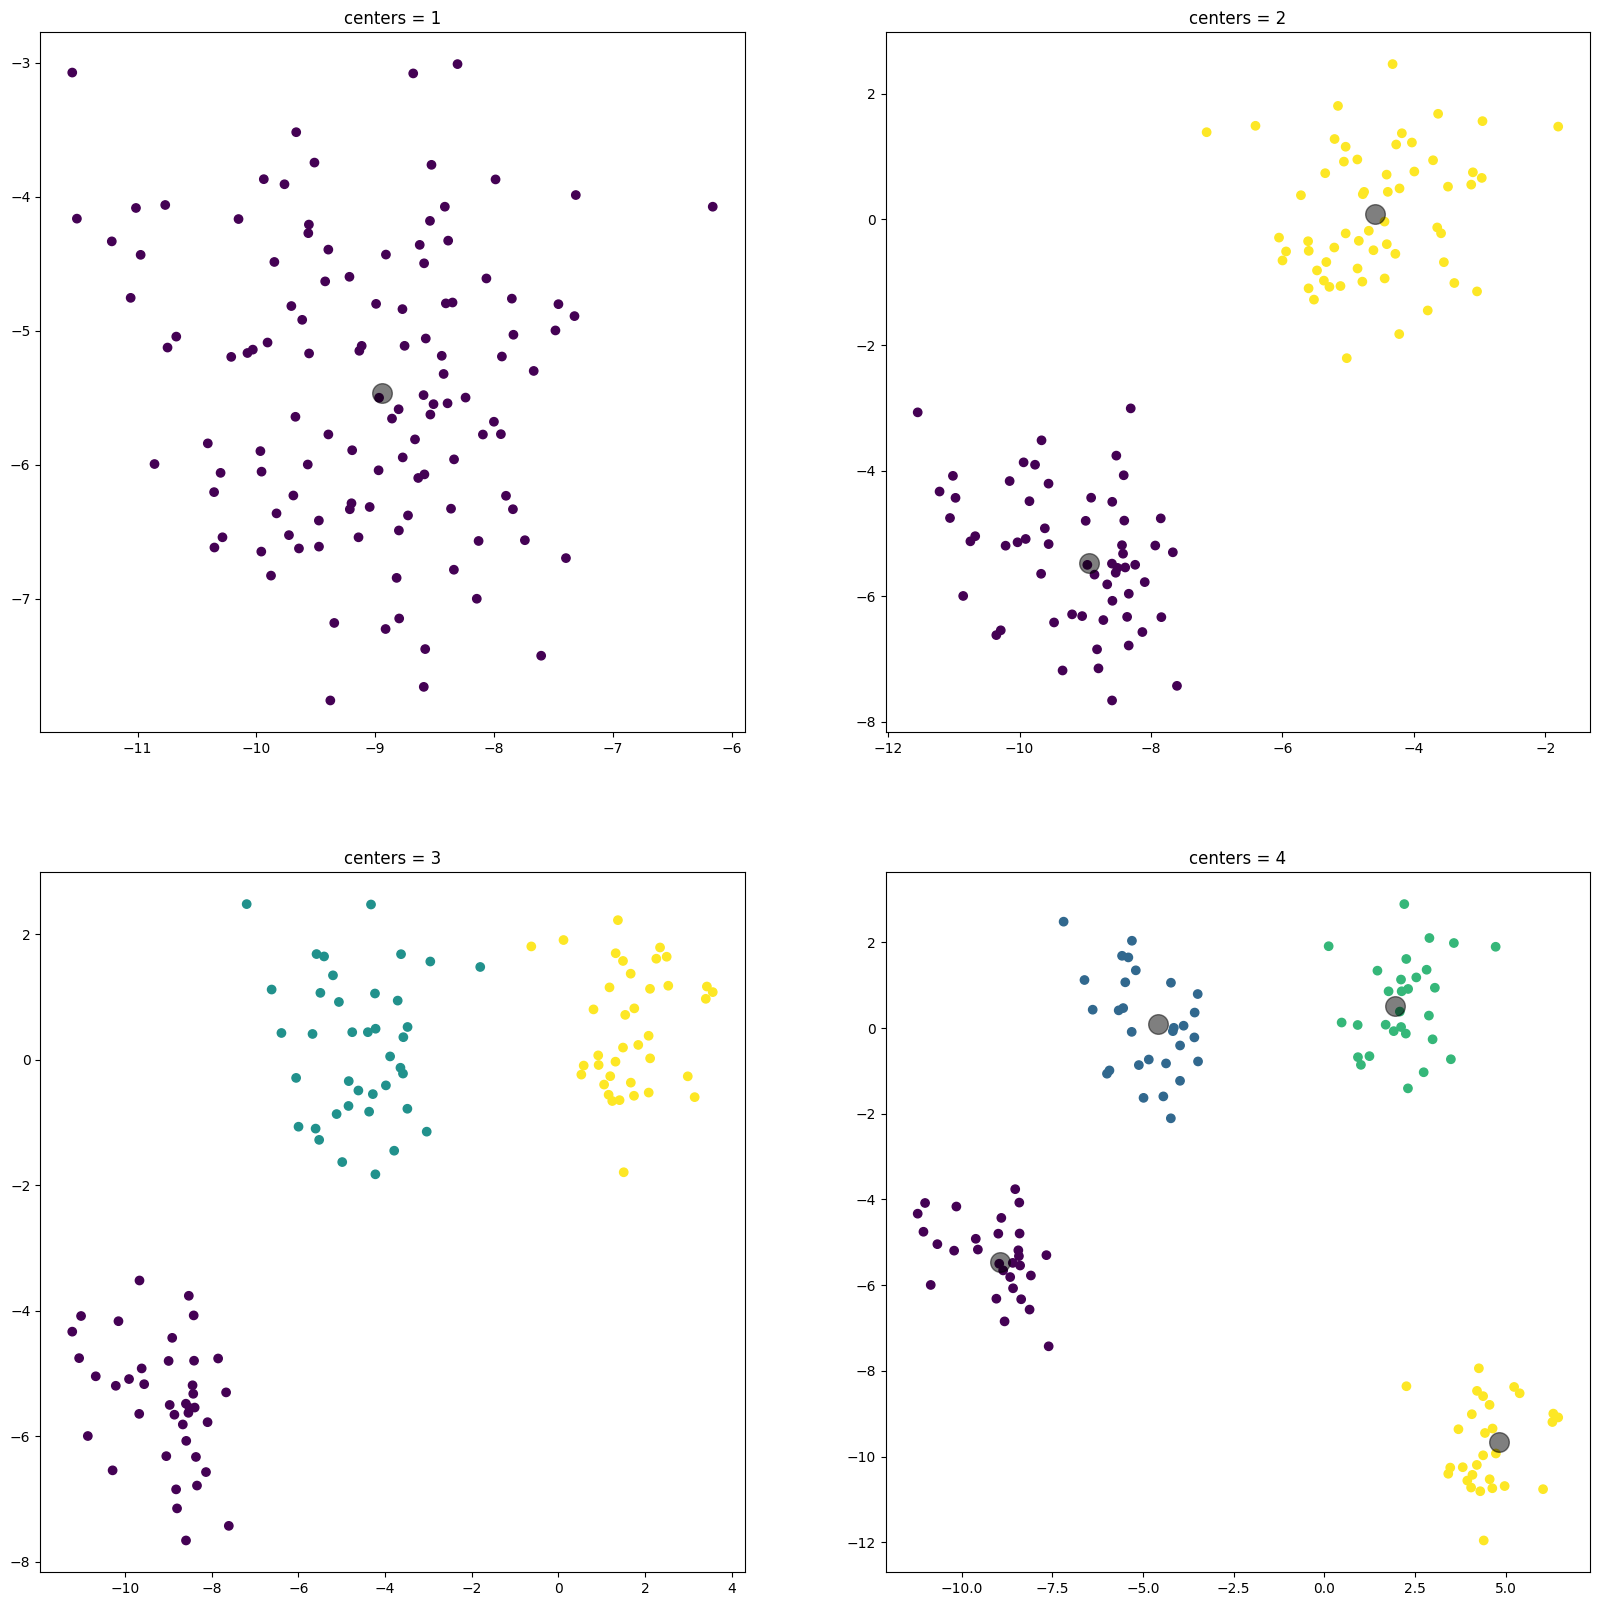

In [ ]:
# Isotropic gausian blobs are generated for clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_blobs

#load dataset
dframe = load_diabetes()
print(dframe)

# plot graphs
fig, axes = plt.subplots(2, 2, figsize = (20,20))

# perform clustering 1 and plot
# note the features are column 0 and column 1
clusters = make_blobs(n_samples=116, random_state = 170, n_features=2, centers=1, return_centers = True)
X = clusters[0]
label_true = clusters[1]
centers = clusters[2]
print('Shape of X')
print(X.shape)
axes[0,0].scatter(X[:,0], X[:,1], c=label_true)
axes[0,0].set_title('centers = 1')
axes[0,0].scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
print('Label 1')
print(label_true)
print("\n")

print("The center is: ")
print(centers)
print("\n")

# perform clustering 1 and plot
clusters = make_blobs(n_samples=116, random_state = 170, n_features=2, centers=2, return_centers = True)
X = clusters[0]
label_true = clusters[1]
centers = clusters[2]
print('Shape of X')
print(X.shape)
axes[0,1].scatter(X[:,0], X[:,1], c=label_true)
axes[0,1].set_title('centers = 2')
axes[0,1].scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
print("Label 2")
print(label_true)
print("\n")
print("The centers are: ")
print(centers)
print("\n")

# perform clustering 3 and plot
X, label_true = make_blobs(n_samples=116, random_state = 170, n_features=2, centers=3)
print("Shape of X")
print(X.shape)
axes[1,0].scatter(X[:, 0], X[:,1], c=label_true)
axes[1,0].set_title('centers = 3')
print("Label 3")
print(label_true)
print("\n")

# perform clustering 4 and plot
clusters = make_blobs(n_samples=116, random_state=170, n_features=2, centers = 4, return_centers = True)
X = clusters[0]
label_true = clusters[1]
centers = clusters[2]
print('Shape of X')
print(X.shape)
axes[1,1].scatter(X[:, 0], X[:,1], c=label_true)
axes[1,1].set_title('centers = 4')
axes[1,1].scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
print("Label 4")
print(label_true)
print("\n")


K Means Clustering

In [ ]:
# use all features except classification on this diabetes dataset, we will predict the classification
# without scaling and transformation
# compare the observed classification and unsupervised clusters

import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans

# load dataset
data = pd.read_excel('diabetes.xlsx')
print(data.head())
print("\n")
X = data.drop(['Classification'],axis=1)
true_class = data['Classification']
print(X.head())
print("\n")
print(true_class.head())
print("\n")

# perform clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

# print off the labels of the kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
# note there are two centroids and each centriod comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

# evalute clustering performance
# adjusted r and index is a function that measures the similarity of the two assignments
# ignoring permutations and with chance normalization
# values from -1 to 1. +1 - perfect match; 0 and -ve value members are split across different clusters
print('Clustering performance evaluation')
print('Adjusted r and index', metrics.adjusted_rand_score(true_class, cluster_class))
print("\n")

# plot
# cannot have a plot because it is hyperplane
# look at example 3 for 2 predictors
# look at example 4 for 3 predictors

# use the clusters to predict the classification for a set of inputs
input = [[48, 20, 80, 5, 0.5, 5.6, 13, 12, 300]]
pred_class = kmeans.predict(input)
print('The predicted classficiation is: ')
print(pred_class)

input2 = [[65, 40, 130, 20, 1.5, 30, 21, 15, 700]]
pred_class2 = kmeans.predict(input2)
print("The predicted classification is ")
print(pred_class2)


# clustering performance evaluation
# adjusted R score -0.00884.... (Note that range should be -1 to 1; positive values means similarity is high.
# 0 and negative means members are split across different clusters.)
# the predicted classification is [0]
# the predicted classification is [1]

   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.36

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  
0  417.114               1  
1  468.786               1  
2  554.697               1  
3  928.220               1  
4  773.920               1  


           BMI  Glucose
0    23.500000       70
1    20.690495       92
2    23.124670       91
3    21.367521       77
4    21.111111       92
..         ...      ...
111  26.850000       92
112  26.840000      100
113  32.050000       97
114  25.590000       82
115  27.180000      138

[116 rows x 2 columns]


0      1
1      1
2    

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


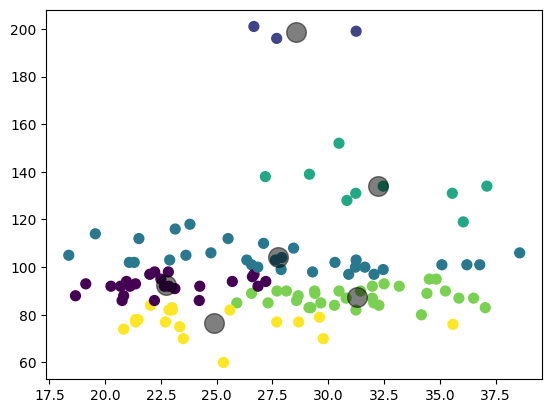

In [ ]:
# use K-Means to create 6 clusters (0,1,2,3,4,5) based on columns BMI and Glucose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

#Load dataset
data = pd.read_excel('diabetes.xlsx')
print(data.head())
print("\n")

# select columns for X
X = data[['BMI','Glucose']]

true_class = data['Classification']
print(X)
print("\n")
print(true_class)
print("\n")

# peform clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

# print of the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")

# note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

# plot the graphs
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X['BMI'], X['Glucose'], c=y_kmeans, s=50, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
print('Center for cluster 0 is ', centers[0])
print('Center for cluster 1 is ', centers[1])
print('Center for cluster 2 is ', centers[2])
print('Center for cluster 3 is ', centers[3])
print('Center for cluster 4 is ', centers[4])
print('Center for cluster 5 is ', centers[5])
print('\n')

plt.scatter(centers[:, 0], centers[:,1], c='black', s=200, alpha=0.5);
#Prediction of cluster
input = [[20.0, 93.6]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)


input2 = [[65.0, 83.6]]
pred_cluster2 = kmeans.predict(input2)
print("The predicted cluster  is ")
print(pred_cluster2)

input3 = [[14.8, 110.0]]
pred_cluster3 = kmeans.predict(input3)
print("The predicted cluster  is ")
print(pred_cluster3)


   sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


     sepal_length  sepal_width
0             5.1          3.5
1             4.9          3.0
2             4.7          3.2
3             4.6          3.1
4             5.0          3.6
..            ...          ...
145           6.7          3.0
146           6.3          2.5
147           6.5          3.0
148           6.2          3.4
149           5.9          3.0

[150 rows x 2 columns]


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: name, Length: 150, dtyp

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


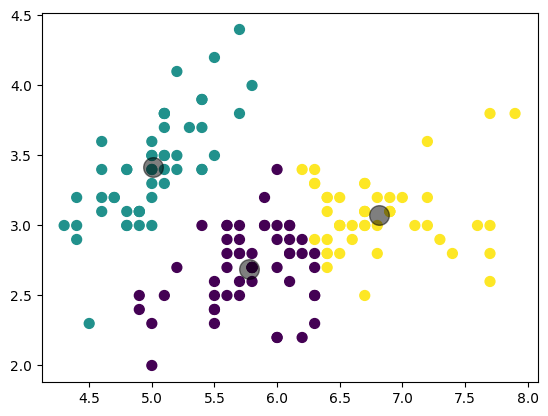

In [ ]:
# iris dataset:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

#Load dataset
data = pd.read_csv('iris.csv')
print(data.head())
print("\n")

#Select columns for X
X = data[['sepal_length', 'sepal_width']]
true_class = data['name']
print(X)
print("\n")
print(true_class)
print("\n")


# perform clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")

#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments,
#ignoring permutations and with chance normalization
print("Adjusted Rand Index is ", metrics.adjusted_rand_score(true_class, cluster_class))
print("\n")

#Plot the graphs
plt.scatter(X['sepal_length'], X['sepal_width'], c=cluster_class, s=50, cmap='viridis')

#plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


   sepal_length  sepal_width  petal_length  petal_width    name
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


     sepal_length  sepal_width  petal_length
0             5.1          3.5           1.4
1             4.9          3.0           1.4
2             4.7          3.2           1.3
3             4.6          3.1           1.5
4             5.0          3.6           1.4
..            ...          ...           ...
145           6.7          3.0           5.2
146           6.3          2.5           5.0
147           6.5          3.0           5.2
148           6.2          3.4           5.4
149           5.9          3.0           5.1

[150 rows x 3 columns]


0         setosa
1         setosa
2         seto

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


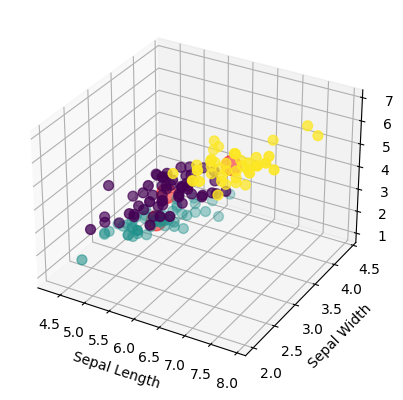

The predicted cluster is 
[1]
The predicted cluster  is 
[2]
The predicted cluster  is 
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# using the iris.csv dataset, clustering k = 3 will be based on features, sepal width, sepal length, and petal length

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.cluster import KMeans


#Load dataset
data = pd.read_csv('iris.csv')
print(data.head())
print("\n")

#Select columns for X
X = data[['sepal_length', 'sepal_width', 'petal_length']]
true_class = data['name']
print(X)
print("\n")
print(true_class)
print("\n")


#Perform Clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
cluster_class = kmeans.predict(X)
print(cluster_class)
print("\n")


#Print off the labels of kmeans model
print('The kmeans labels are: ')
print(kmeans.labels_)
print("\n")
#Note there are two centroids and each centroid comprises the values for all the predictors
print(kmeans.cluster_centers_)
print("\n")

#Evaluate Clustering Performance
#adjusted Rand index is a function that measures the similarity of the two assignments,
#ignoring permutations and with chance normalization
print("Adjusted Rand Index is", metrics.adjusted_rand_score(true_class, cluster_class))

# plot the graphs
fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.scatter(X['sepal_length'],X['sepal_width'], X['petal_length'], c=cluster_class, s=50, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c='red', s=200, alpha=0.5);

ax.set_xlabel('Sepal Length');
ax.set_ylabel('Sepal Width');
ax.set_zlabel('Petal Length');

plt.show()

#Prediction of cluster
input = [[5.0, 3.6, 1.7]]
pred_cluster = kmeans.predict(input)
print("The predicted cluster is ")
print(pred_cluster)


input2 = [[6.0, 3.6, 5.6]]
pred_cluster2 = kmeans.predict(input2)
print("The predicted cluster  is ")
print(pred_cluster2)

input3 = [[4.8, 4.6, 3.2]]
pred_cluster3 = kmeans.predict(input3)
print("The predicted cluster  is ")
print(pred_cluster3)


In [ ]:
# Association Rules
# basket analysis

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

dataset = pd.read_excel('Online_Retail.xlsx')
print(dataset.head())
print(dataset.isnull().count())
print("\n")

#Basket
basket = dataset[dataset['Country'] == 'France']
print("This is basket")
print(basket)
print("\n")

basket_plus = (dataset[dataset['Country'] == 'France']
               .groupby(['InvoiceNo', 'Description'])['Quantity']
               .sum().unstack()
               .reset_index().fillna(0)
               .set_index('InvoiceNo'))
print("This is basket plus")
print(basket_plus)
print("\n")


#Encode the data to encode basket data into binary data to show
#whether item is bought (1) or not bought (0)
#Negative numbers are returned as 0 while more than 1 returned as 1
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_encode_plus = basket_plus.applymap(encode_units)
print("This is basket encode plus")
print(basket_encode_plus)
print("\n")

#Filter the transactions - only focus on more than 1 items bought
#The market basket analysis will help uncover the association between 2 or more items
#bought based on historical data
#axis = 1 is for columns
basket_filter_plus = basket_encode_plus[(basket_encode_plus >0).sum(axis=1) >= 2]
print("This is basket filter plus")
print(basket_filter_plus)
print("\n")

#Apply apriori algorithm to find frequently bought items in the dataset
frequent_itemsets = apriori(basket_filter_plus, min_support = 0.03, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print("This is Frequent Itemsets")
print(frequent_itemsets)
print("\n")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
InvoiceNo      541909
StockCode      541909
Description    541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     541909
Country        541909
dtype: int64


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
